In [19]:
import pandas as pd

clima = pd.read_csv('https://github.com/paulosalvatore/Ocean_Python_VisualizacaoDados_11_08_20/raw/master/MaterialApoio/clima.csv')
clima = clima.rename(columns={" vento_rajada": "vento_rajada"})

In [21]:
import plotly.offline as ply
import plotly.graph_objs as go

ply.init_notebook_mode(connected=True)

In [22]:
# Devido o Plotly estar sendo utilizado no Google Colab, precisaremos definir
# a função abaixo e chamá-la sempre que quisermos exibir um gráfico

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [23]:
configure_plotly_browser_state() # Específico para o Colab

barra = go.Bar(x=clima['hora'], y=clima['precipitacao'])

ply.iplot([barra])

In [33]:
configure_plotly_browser_state()

umid_max = go.Bar(x=clima['hora'], y=clima['umid_max'], name='Umid. Máxima', marker = {'color': '#9770E0'})
umid_min = go.Bar(x=clima['hora'], y=clima['umid_min'], name='Umid. Mínima')

data = [umid_max, umid_min]

ply.iplot(data)

In [39]:
configure_plotly_browser_state()

vento_vel = go.Bar(x=clima['hora'], y=clima['vento_vel'], name='Normal', marker = {'color': '#feca57'})
vento_rajada = go.Bar(x=clima['hora'], y=clima['vento_rajada'], name='Rajada', marker = {'color': '#000fff'})

data = [vento_vel, vento_rajada]

layout = go.Layout(title='Velocidade do Vento (com Rajadas)', xaxis={'title': 'Hora do Dia'}, yaxis={'title': 'Velocidade (km/h)'}, barmode='stack')
fig = go.Figure(data=data, layout=layout)

ply.iplot(fig)

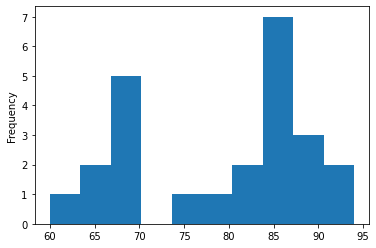

In [48]:
clima['umid_min'].plot.hist()

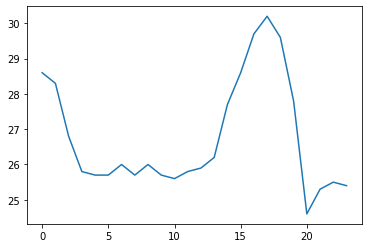

In [51]:
clima.temp_inst.plot.line()

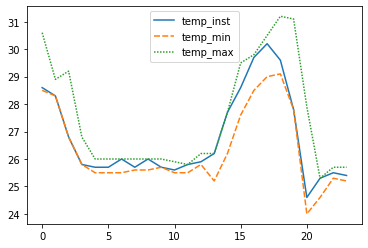

In [55]:
import seaborn as sns

sns.lineplot(data=[clima.temp_inst, clima.temp_min, clima.temp_max])

In [64]:
configure_plotly_browser_state()

temp_min = go.Bar(x=clima['hora'], y=clima['temp_min'], name='Temperatura Mínima')
temp_max = go.Bar(x=clima['hora'], y=clima['temp_max'], name='Temperatura Máxima')
temperatura = go.Scatter(x = clima['hora'], y = clima['temp_inst'], mode = 'markers+lines', name = 'Temp. Inst.')

data=[temp_min, temp_max, temperatura]

layout = go.Layout(title='Temp', xaxis={'title': 'Hora do Dia'}, yaxis={'title': 'Temp'}, barmode='stack')
fig = go.Figure(data=data, layout=layout)

ply.iplot(fig)

import plotly.express as px

fig.write_html("grafico.html")